# Importación de librerías

<a href="https://colab.research.google.com/github/ramajoballester/UC3M-PIC/blob/main/notebooks/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ejecutar esta celda ÚNICAMENTE si se está trabajando en GOOGLE COLAB

if 'google.colab' in str(get_ipython()):
    import os
    ! git clone https://github.com/ramajoballester/UC3M-PIC.git
    os.chdir('UC3M-PIC')
    ! pip install .
    print('UC3M-PIC instalado en Colab')
else:
    print('Ejecutando en local')

In [180]:
import os
import cv2
import uc3m_pic
import torchvision

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import hsv_to_rgb
from torchvision.io import ImageReadMode

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Entrada y salida de imagen

In [181]:
# Leer imagen en escala de grises
img_bw_path = os.path.join(uc3m_pic.__path__[0], '..', 'data', 'cat.jpeg')
img_color_path = os.path.join(uc3m_pic.__path__[0], '..', 'data', 'beach.jpeg')
img_bw = torchvision.io.read_image(img_bw_path, ImageReadMode.GRAY)
img_color = torchvision.io.read_image(img_color_path)

In [182]:
print(f'B/W Image shape: {img_bw.shape}')
print(f'Color Image shape: {img_color.shape}')

B/W Image shape: torch.Size([1, 1500, 2250])
Color Image shape: torch.Size([3, 1500, 2250])


In [183]:
# Cambiar el orden de los canales
img_bw.permute(1, 2, 0).shape

torch.Size([1500, 2250, 1])

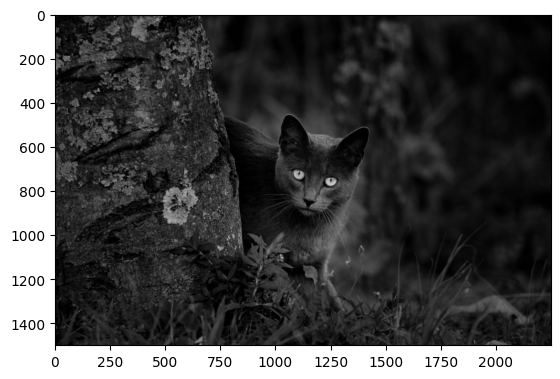

In [184]:
plt.imshow(img_bw.permute(1, 2, 0), cmap='gray');

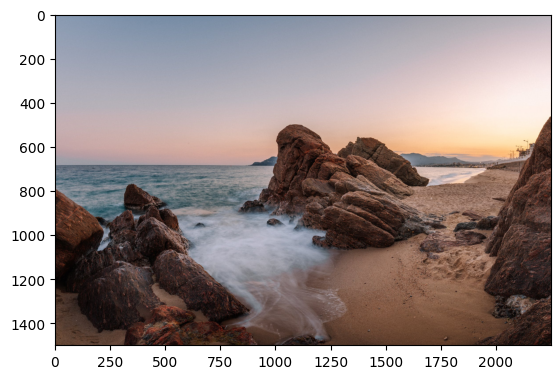

In [185]:
plt.imshow(img_color.permute(1, 2, 0));

# Manipulación de imágenes

## Histograma

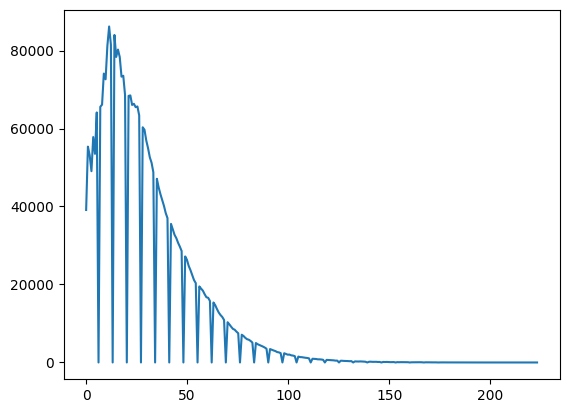

In [186]:
bw_hist = np.histogram(img_bw, bins=256)
plt.plot(bw_hist[1][:-1], bw_hist[0]);

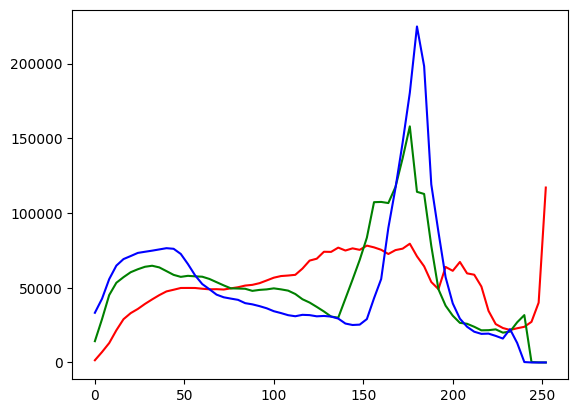

In [187]:
# Calcular el histograma de cada canal y graficarlo

r_hist = np.histogram(img_color[0], bins=64, range=(0, 256))
g_hist = np.histogram(img_color[1], bins=64, range=(0, 256))
b_hist = np.histogram(img_color[2], bins=64, range=(0, 256))

plt.plot(r_hist[1][:-1], r_hist[0], color='r')
plt.plot(g_hist[1][:-1], g_hist[0], color='g')
plt.plot(b_hist[1][:-1], b_hist[0], color='b')
plt.show()

## Histogram equalization

In [188]:
# Equalizar el histograma de la imagen
img_bw_eq = torchvision.transforms.functional.equalize(img_bw)

img_color_eq = np.zeros(img_color.shape, np.uint8)
img_color_eq = torchvision.transforms.functional.equalize(img_color)

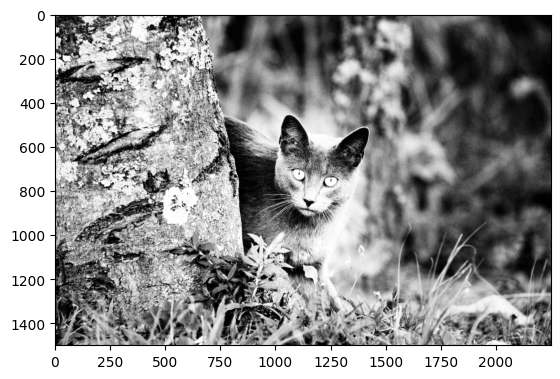

In [189]:
plt.imshow(img_bw_eq.permute((1, 2, 0)), cmap='gray')

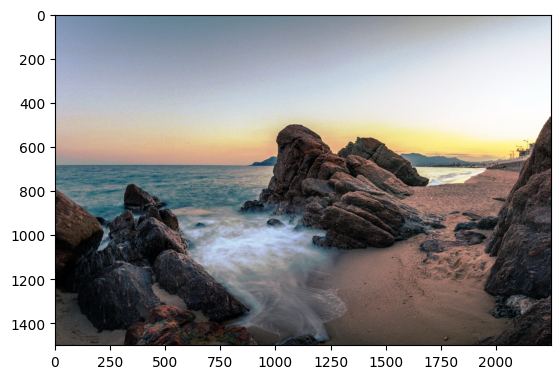

In [190]:
plt.imshow(img_color_eq.permute((1, 2, 0)));

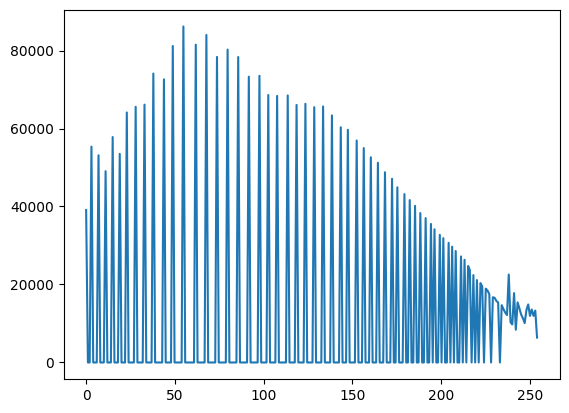

In [13]:
bw_hist_eq = np.histogram(img_bw_eq, bins=256)
plt.plot(bw_hist_eq[1][:-1], bw_hist_eq[0]);

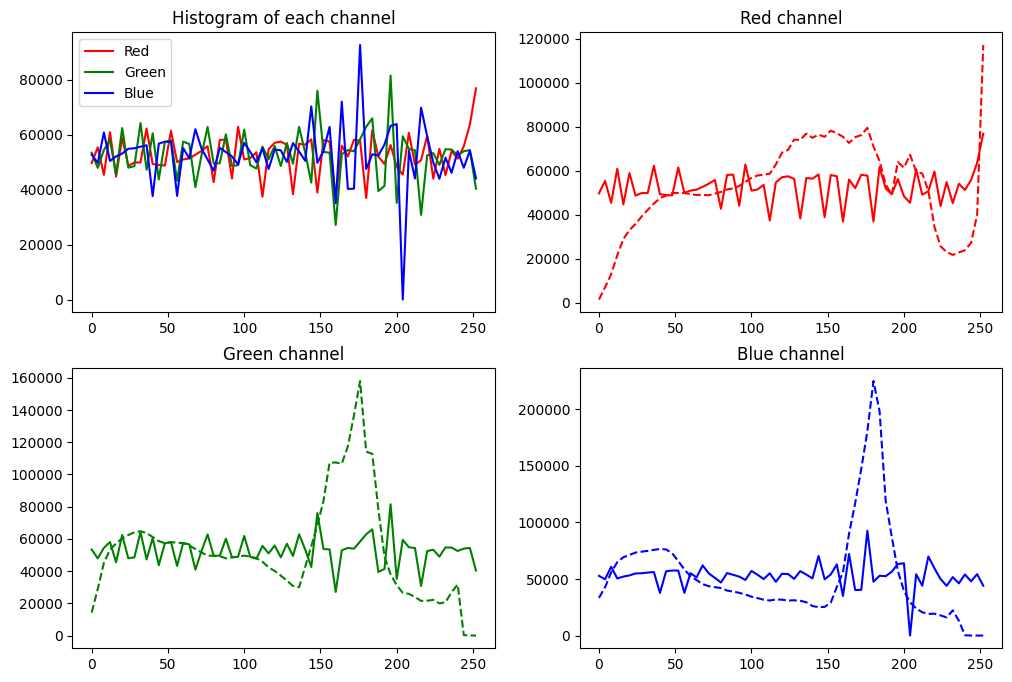

In [198]:
# Calcular el histograma de cada canal y graficarlo

r_hist_eq = np.histogram(img_color_eq[0], bins=64, range=(0, 256))
g_hist_eq = np.histogram(img_color_eq[1], bins=64, range=(0, 256))
b_hist_eq = np.histogram(img_color_eq[2], bins=64, range=(0, 256))

fig, axs = plt.subplots(2,2, figsize=(12, 8))
axs[0, 0].plot(r_hist_eq[1][:-1], r_hist_eq[0], color='r')
axs[0, 0].plot(g_hist_eq[1][:-1], g_hist_eq[0], color='g')
axs[0, 0].plot(b_hist_eq[1][:-1], b_hist_eq[0], color='b')
axs[0, 0].set_title('Histogram of each channel')
axs[0, 0].legend(['Red', 'Green', 'Blue'])

axs[0, 1].plot(r_hist_eq[1][:-1], r_hist_eq[0], color='r')
axs[0, 1].plot(r_hist[1][:-1], r_hist[0], color='r', linestyle='dashed')
axs[0, 1].set_title('Red channel')

axs[1, 0].plot(g_hist_eq[1][:-1], g_hist_eq[0], color='g')
axs[1, 0].plot(g_hist[1][:-1], g_hist[0], color='g', linestyle='dashed')
axs[1, 0].set_title('Green channel')

axs[1, 1].plot(b_hist_eq[1][:-1], b_hist_eq[0], color='b')
axs[1, 1].plot(b_hist[1][:-1], b_hist[0], color='b', linestyle='dashed')
axs[1, 1].set_title('Blue channel')
plt.show()

# Espacios de color

## RGB

In [15]:
# Crear una imagen de 3x640x1280 con 3 canales. Cada canal es un linspace de 0 a 255.
# El canal rojo es de 0 a 255, el canal verde es de 0 a 255 y luego de vuelta a 0, el canal azul es de 255 a 0
img = np.zeros((3, 640, 1280))
img[0] = np.linspace(0, 255, 1280)
img[1] = np.concatenate((np.linspace(0, 255, 640), np.linspace(255, 0, 640)))
img[2] = np.linspace(255, 0, 1280)

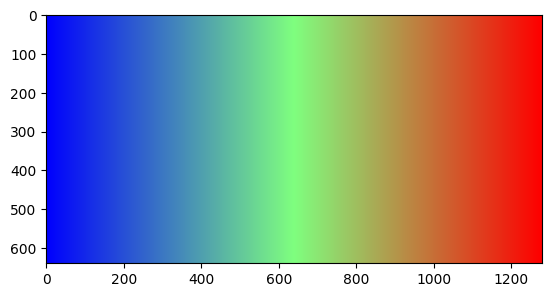

In [16]:
# Mostrar la imagen
plt.imshow(np.moveaxis(img, 0, -1).astype(np.uint8))
plt.show()

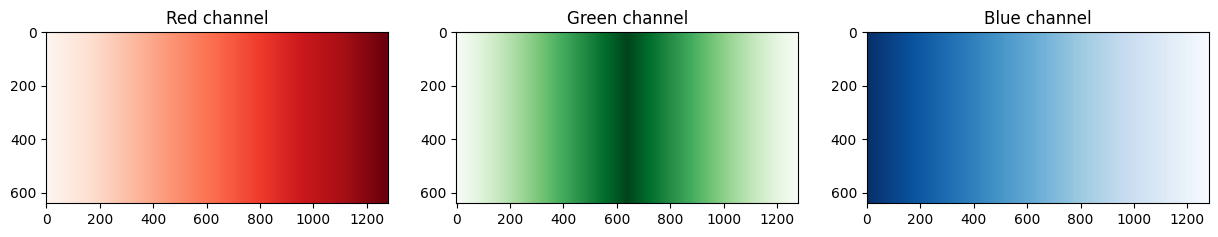

In [17]:
# Graficar cada canal en un subplot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img[0], cmap='Reds')
ax[0].set_title('Red channel')

ax[1].imshow(img[1], cmap='Greens')
ax[1].set_title('Green channel')

ax[2].imshow(img[2], cmap='Blues')
ax[2].set_title('Blue channel')

plt.show()

## HSV

In [18]:
# Crear una imagen de 3x640x1280 con 3 canales HSV. El canal de matiz es un 
# linspace de 0 a 255. Los canales de saturación y valor son 255.

img_hsv = np.ones((3, 640, 1280), dtype=np.uint8) * 255
img_hsv[0] = np.linspace(0, 255, 1280)

# El canal de saturación es un linspace de 0 a 255 en la mitad superior de la 
# imagen (primeras filas) y 255 en la mitad inferior
sat_channel = np.linspace(0, 255, 320)
sat_channel = np.expand_dims(sat_channel, axis=1)
sat_channel = np.repeat(sat_channel, 1280, axis=1)
img_hsv[1, :320] = sat_channel

value_channel = np.linspace(255, 0, 320)
value_channel = np.expand_dims(value_channel, axis=1)
value_channel = np.repeat(value_channel, 1280, axis=1)
img_hsv[2, 320:] = value_channel

# Convertir la imagen HSV a RGB
img_rgb = hsv_to_rgb(np.moveaxis(img_hsv, 0, -1) / 255)
img_rgb = np.moveaxis(img_rgb, -1, 0)

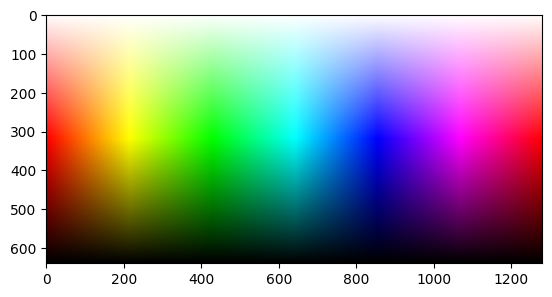

In [19]:
# Mostrar la imagen
plt.imshow(np.moveaxis(img_rgb, 0, -1))
plt.show()

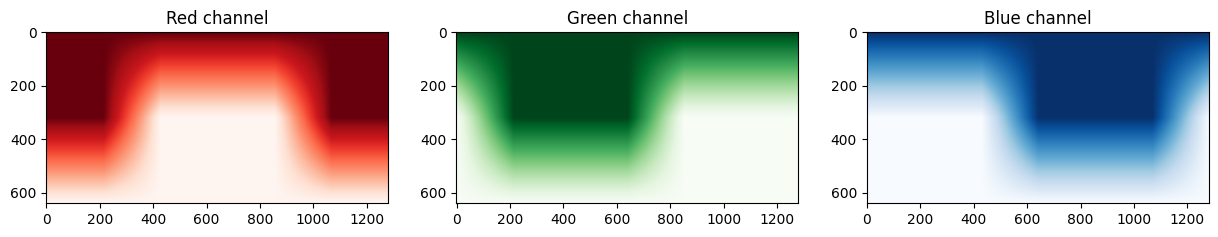

In [20]:
# Graficar cada canal en un subplot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img_rgb[0], cmap='Reds')
ax[0].set_title('Red channel')

ax[1].imshow(img_rgb[1], cmap='Greens')
ax[1].set_title('Green channel')

ax[2].imshow(img_rgb[2], cmap='Blues')
ax[2].set_title('Blue channel')

plt.show()

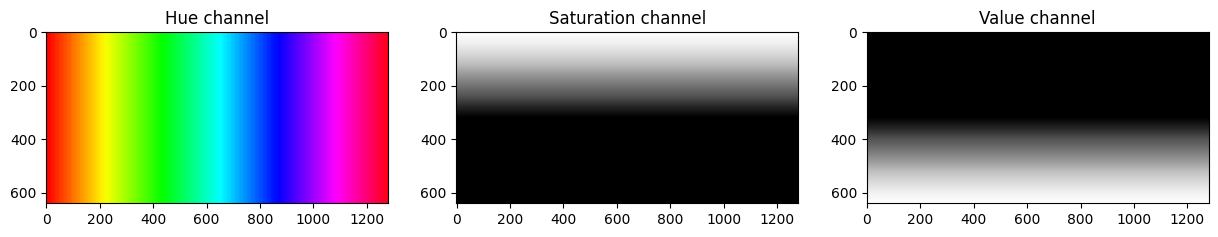

In [21]:
# Graficar cada canal en un subplot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img_hsv[0], cmap='hsv')
ax[0].set_title('Hue channel')

ax[1].imshow(img_hsv[1], cmap='Greys')
ax[1].set_title('Saturation channel')

ax[2].imshow(img_hsv[2], cmap='Greys')
ax[2].set_title('Value channel')

plt.show()

# Detección de bordes

In [22]:
import cv2

In [98]:
img_path = os.path.join(uc3m_pic.__path__[0], '..', 'data', 'building.jpeg')
# Leer imagen en escala de grises
img = cv2.imread(img_path)

img = img[100:400]

In [99]:
img.shape

(300, 563, 3)

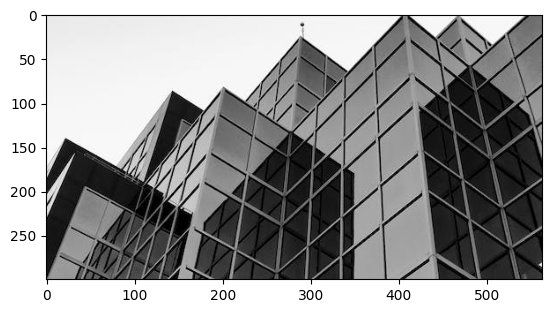

In [101]:
plt.imshow(img)
plt.show()

## Detector Canny

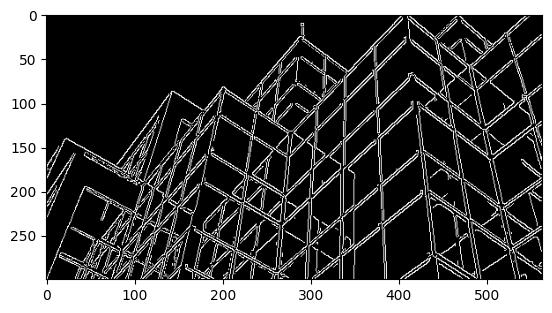

In [102]:
# Detectar bordes con Canny
borders_canny = cv2.Canny(img, 100, 200)
plt.imshow(borders_canny, cmap='gray')
plt.show()

## Cálculo de la derivada (Sobel)

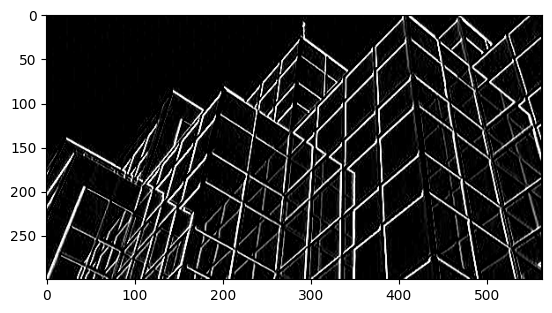

In [103]:
# Detectar bordes con filtro Sobel
borders_sobel = cv2.Sobel(img, ddepth=0, dx=1, dy=0, ksize=3)
plt.imshow(borders_sobel, cmap='gray')
plt.show()

## Transformada de Hough

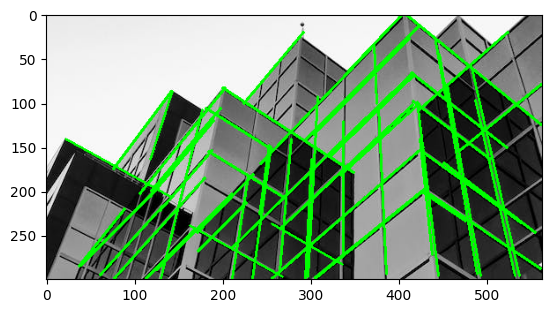

In [104]:
img_lines = img.copy()
lines = cv2.HoughLinesP(borders_canny, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img_lines, cmap='gray')
plt.show()

# Detección de movimiento

## Flujo óptico Lucas-Kanade

In [170]:
img_path = os.path.join(uc3m_pic.__path__[0], '..', 'data')
imgs = []
for i in range(1, 6):
    img = cv2.imread(os.path.join(img_path, f'square0{i}.png'))
    imgs.append(img)
imgs = np.array(imgs)

In [171]:
imgs.shape

(5, 590, 597, 3)

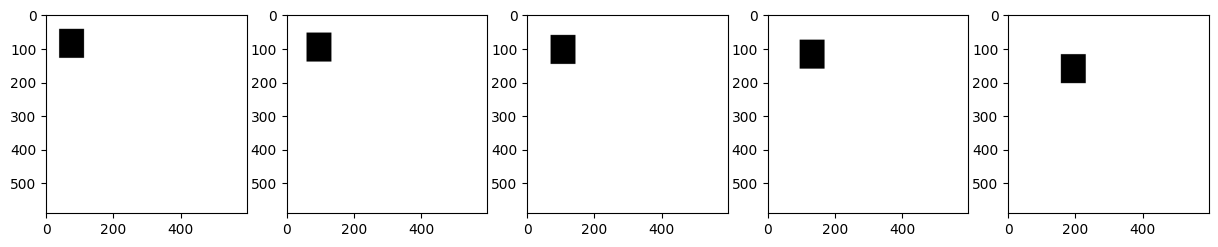

In [172]:
# Graficar cada imagen en un subplot
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(imgs[i], cmap='gray')
plt.show()

In [178]:
# Parámetros para el algoritmo de detección de esquinas Shi-Tomasi
feature_params = dict(maxCorners = 4, qualityLevel = 0.01, 
                        minDistance = 10, blockSize = 3)

# Parámetros para el algoritmo de flujo óptica Lucas-Kanade
lk_params = dict(winSize = (11, 11), maxLevel = 5, 
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Crear colores aleatorios para dibujar los puntos
color = np.random.randint(0, 255, (100, 3))

# Tomar la primera imagen y encontrar las esquinas
old_frame = imgs[0]
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

imgs_flow = imgs.copy()

# Crear una máscara para dibujar
mask = np.zeros_like(old_frame)
for i in range(1, len(imgs)):
    frame = imgs[i]
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calcular el flujo óptico
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Seleccionar puntos
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]

    # Dibujar las líneas
    for j, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        imgs_flow[i] = cv2.line(imgs_flow[i], (int(a), int(b)), (int(c), int(d)), [255, 0, 0], 2)
        imgs_flow[i] = cv2.circle(imgs_flow[i], (int(a), int(b)), 5, [255, 0, 0], -1)
        imgs_flow[i] = cv2.circle(imgs_flow[i], (int(c), int(d)), 5, [0, 0, 255], -1)
        # img = cv2.add(frame, mask)

    # Actualizar la imagen previa con los puntos previos
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

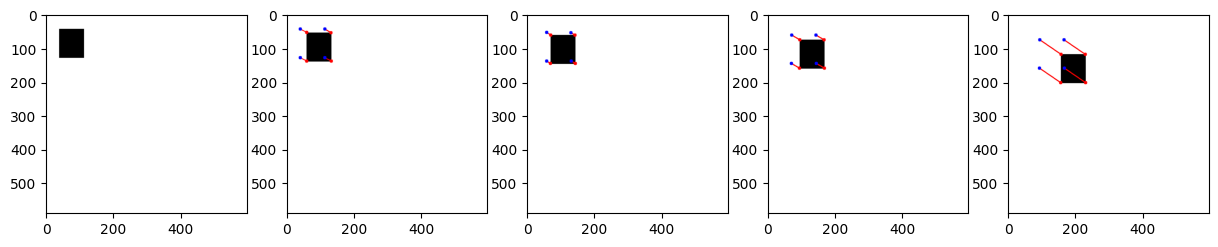

In [179]:
# Graficar cada imagen en un subplot
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(imgs_flow[i])
plt.show()